# Import packages needed

In [360]:
import numpy as np #for working with arrays
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt #for plots and visualisation
import seaborn as sns #for visualisation

# Import data and cleanup

### **Import dataset**

In [361]:
games_sales = pd.read_csv('vgsales.csv', index_col=0) #index_col makes the rank the index
print(games_sales.head()) #check if the data was loaded correctly

                          Name Platform  ...  Other_Sales Global_Sales
Rank                                     ...                          
1                   Wii Sports      Wii  ...         8.46        82.74
2            Super Mario Bros.      NES  ...         0.77        40.24
3               Mario Kart Wii      Wii  ...         3.31        35.82
4            Wii Sports Resort      Wii  ...         2.96        33.00
5     Pokemon Red/Pokemon Blue       GB  ...         1.00        31.37

[5 rows x 10 columns]


### Checking the Data

In [362]:
print(games_sales.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


Observation: The count for the Year and Publisher columns are different to the rest - potential missing data. The data types for Year and the sales columns are all float i.e. numerical values which we expected and the rest are object - not assigned. These will be our analysis subjects

In [363]:
print(games_sales.isna().sum()) #checking for missing data in the dataset

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### **Cleaning the data**

In [364]:
clean_games_sales = games_sales.dropna() #removing the missing values rows as it's a small quantity compared to the overall dataset. Could have also replaced the missing values with the fillna() method.

In [365]:
print(games_sales.shape) #confirmation the missing values row have been removed as the row count is smaller than the original dataset
print(clean_games_sales.shape)

(16598, 10)
(16291, 10)


In [366]:
print(clean_games_sales[['Year', 'Publisher']].isnull().sum()) #further confirmation by checking the column containing the data

Year         0
Publisher    0
dtype: int64


In [367]:
print(clean_games_sales.duplicated().any()) #check for any duplicated data

False


In [368]:
print(clean_games_sales.head()) #ensuring the data format is still correct

                          Name Platform  ...  Other_Sales Global_Sales
Rank                                     ...                          
1                   Wii Sports      Wii  ...         8.46        82.74
2            Super Mario Bros.      NES  ...         0.77        40.24
3               Mario Kart Wii      Wii  ...         3.31        35.82
4            Wii Sports Resort      Wii  ...         2.96        33.00
5     Pokemon Red/Pokemon Blue       GB  ...         1.00        31.37

[5 rows x 10 columns]


In [369]:
print(clean_games_sales.agg([np.mean,np.median]).T)

                     mean   median
Year          2006.405561  2007.00
NA_Sales         0.265647     0.08
EU_Sales         0.147731     0.02
JP_Sales         0.078833     0.00
Other_Sales      0.048426     0.01
Global_Sales     0.540910     0.17


Observation: Mean of the sales columns is more than **3x** the median which shows there are a few high sales games in the data with the majority of the sales data clustered in the lower end.

In [370]:
print(clean_games_sales.columns) #To get a list of column names

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [371]:
clean_games_sales.rename(columns = {'NA_Sales':'North_America_Sales', 'EU_Sales':'Europe_Sales', 'JP_Sales':'Japan_Sales'}, inplace=True) #dictionary used to change the column name to best represent the data.

In [372]:
print(clean_games_sales.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'North_America_Sales',
       'Europe_Sales', 'Japan_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


### **Defining the common lists**

In [373]:
all_sales = ['North_America_Sales','Europe_Sales', 'Japan_Sales', 'Other_Sales', 'Global_Sales']
regional_sales = ['North_America_Sales','Europe_Sales', 'Japan_Sales', 'Other_Sales']
sales_label = ['North America', 'Europe', 'Japan', 'Others']
# Lists will be used as the data is ordered whereas dictionaries are not ordered and better for looking up info.

# Data Analysis

## Total Sales visualised

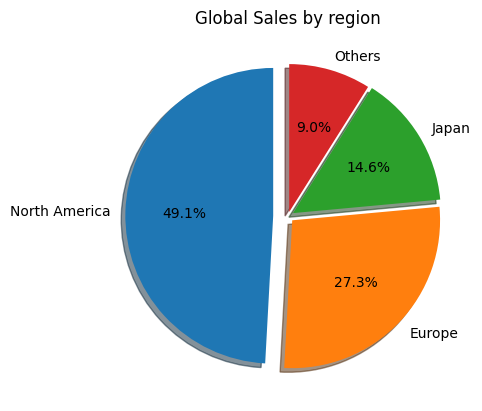

In [374]:
clean_games_sales[regional_sales].sum().plot(kind='pie', startangle=90, title='Global Sales by region', labels=sales_label, shadow = True, explode=[0.1,0.04, 0.04, 0.03], autopct='%1.1f%%') 
plt.show() #Pie chart is an easy visual representation of total sales

        North_America_Sales  Europe_Sales  Japan_Sales  Other_Sales
Year                                                               
1980.0                10.59          0.67         0.00         0.12
1981.0                33.40          1.96         0.00         0.32
1982.0                26.92          1.65         0.00         0.31
2017.0                 0.00          0.00         0.05         0.00
2020.0                 0.27          0.00         0.00         0.02
        North_America_Sales  Europe_Sales  Japan_Sales  Other_Sales
Year                                                               
2014.0               131.97        125.63        39.46        40.02
2015.0               102.82         97.71        33.72        30.01
2016.0                22.66         26.76        13.67         7.75
2017.0                 0.00          0.00         0.05         0.00
2020.0                 0.27          0.00         0.00         0.02


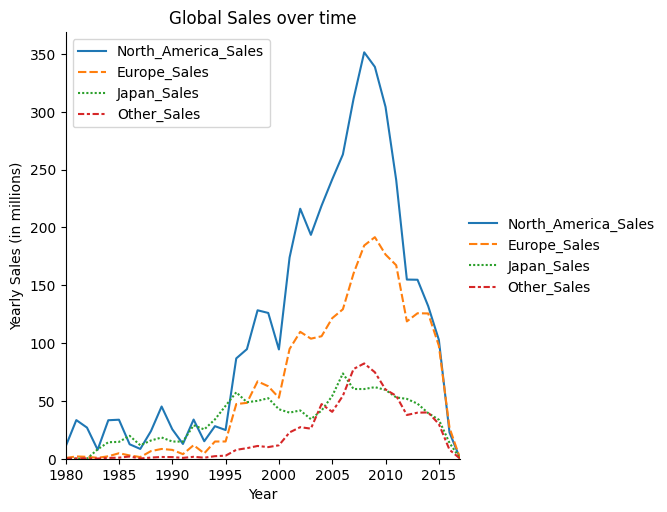

North_America_Sales    351.44
Europe_Sales           191.59
Japan_Sales             73.73
Other_Sales             82.39
dtype: float64


In [375]:
sales_over_time = clean_games_sales.groupby('Year')[regional_sales].sum()
print(sales_over_time[(sales_over_time['North_America_Sales'] == 0) | (sales_over_time['Europe_Sales'] == 0) | (sales_over_time['Japan_Sales'] == 0) | (sales_over_time['Other_Sales'] == 0)]) #checking if any year had no sales
print(sales_over_time.tail()) #returns the last 5 rows which would include the period between 2017 and 2020 which had little sales

sns.relplot(data=sales_over_time, kind='line')
plt.xlim(1980, 2017) #excluding the period as data appears inaccurate
plt.ylim(0)
plt.legend(loc='upper left')
plt.ylabel('Yearly Sales (in millions)')
plt.title('Global Sales over time')
plt.show()

print(sales_over_time.max())

## Genre Visualisation

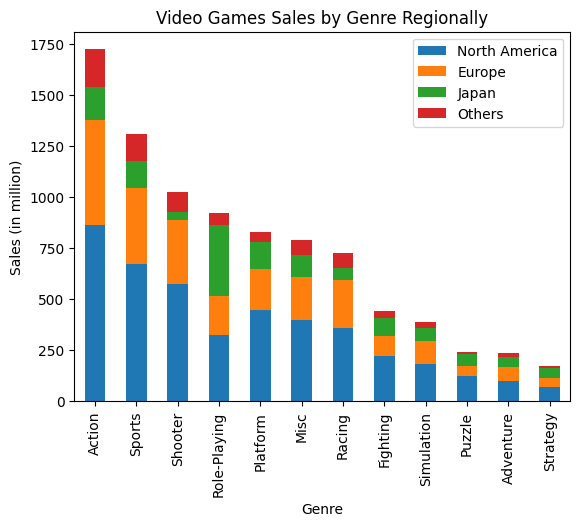

In [376]:
all_sales_genre = clean_games_sales.groupby('Genre')[all_sales].sum().sort_values('Global_Sales', ascending = False)

regional_genre = all_sales_genre[regional_sales]
regional_genre.plot(kind='bar', stacked=True, ylabel='Sales (in million)', title='Video Games Sales by Genre Regionally')
plt.legend(sales_label)
plt.show()


## Publisher Trend

                             Global_Sales  Published_Games
Nintendo                          1784.43              696
Electronic Arts                   1093.39             1339
Activision                         721.41              966
Sony Computer Entertainment        607.28              682
Ubisoft                            473.54              918


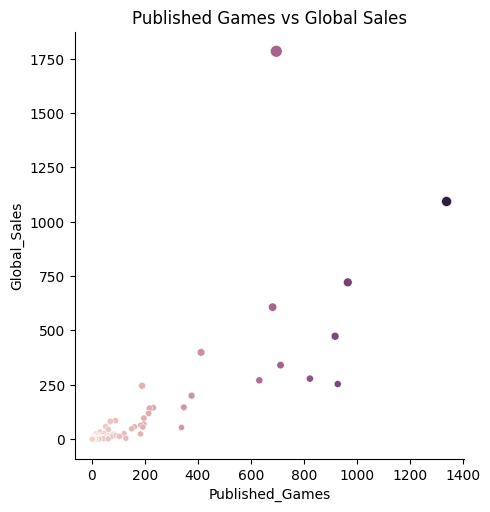

In [377]:
publisher_games = clean_games_sales['Publisher'].value_counts(ascending=False)
publisher_sales = clean_games_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

publisher_data = pd.concat([publisher_sales, publisher_games], axis=1).sort_values('Global_Sales', ascending=False) #concat to merge the DataFrame Series, axis=1 allows a horizontal merge
publisher_data.rename(columns = {'Publisher': 'Published_Games'}, inplace=True)
print(publisher_data.head())
sns.relplot(x='Published_Games', y='Global_Sales', data=publisher_data, kind='scatter', hue='Published_Games', size='Global_Sales', legend=False)
plt.title('Published Games vs Global Sales')
plt.show()

## Platform Trend

      Platform_Released_Games  Global_Sales
PS2                      2127       1233.46
X360                     1234        969.60
PS3                      1304        949.35
Wii                      1290        909.81
DS                       2131        818.91


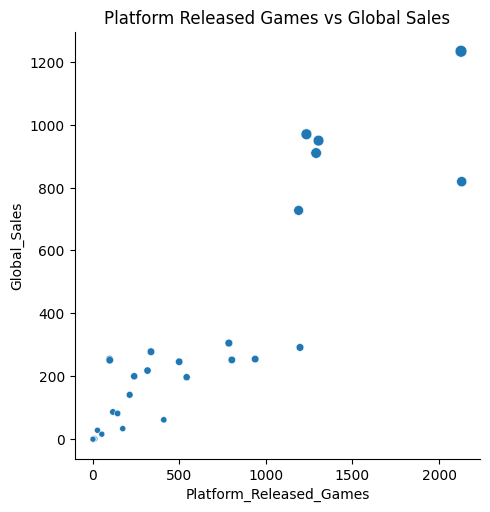

In [378]:
platform_games = clean_games_sales['Platform'].value_counts(ascending=False)
platform_sales = clean_games_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_data = pd.concat([platform_games, platform_sales], axis=1).sort_values('Global_Sales', ascending=False)
platform_data.rename(columns = {'Platform': 'Platform_Released_Games'}, inplace=True)
print(platform_data.head())

sns.relplot(x='Platform_Released_Games', y='Global_Sales', data=platform_data, kind='scatter', size='Global_Sales', legend=False)
plt.title('Platform Released Games vs Global Sales')
plt.show()

## Popular Genre, Platform and Publishers by Region

In [379]:
trends = ['Genre','Platform', 'Publisher']
for r in regional_sales:
    for t in trends:
        most = clean_games_sales.groupby(t)[r].sum().sort_values(ascending=False).head(1)
        print(most)

Genre
Action    861.77
Name: North_America_Sales, dtype: float64
Platform
X360    594.33
Name: North_America_Sales, dtype: float64
Publisher
Nintendo    815.75
Name: North_America_Sales, dtype: float64
Genre
Action    516.48
Name: Europe_Sales, dtype: float64
Platform
PS3    340.47
Name: Europe_Sales, dtype: float64
Publisher
Nintendo    418.3
Name: Europe_Sales, dtype: float64
Genre
Role-Playing    350.29
Name: Japan_Sales, dtype: float64
Platform
DS    175.02
Name: Japan_Sales, dtype: float64
Publisher
Nintendo    454.99
Name: Japan_Sales, dtype: float64
Genre
Action    184.92
Name: Other_Sales, dtype: float64
Platform
PS2    190.47
Name: Other_Sales, dtype: float64
Publisher
Electronic Arts    127.63
Name: Other_Sales, dtype: float64
